In [38]:
from __future__ import print_function, division

## 0.1 Settings and Importing Modules

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt

%matplotlib inline

In [297]:
# setting option to round floats to 2 sig figs and also avoid scientific notation

pd.set_option('display.float_format', '{:.2f}'.format) 

## 1.1 Loading Data

In [42]:
datafiles = ['mta_data/' + x for x in os.listdir('mta_data/')]

list_ = []
for file_ in datafiles:
    df = pd.read_csv(file_)
    list_.append(df)
df = pd.concat(list_)

## 2.1 Cleaning Data

In [45]:
# clearing whitespace from column names

df.rename(columns=lambda x: x.strip(), inplace=True)

In [46]:
# adding days of the week so we can differentiate between week day and weekend

df.DATE = pd.to_datetime(df.DATE)
df['WEEKDAY'] = df.DATE.dt.dayofweek
days = {0:'Monday',1:'Tuesday',2:'Wedsday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df.WEEKDAY = df.WEEKDAY.apply(lambda x: days[x])


In [ ]:
# converting TIME column to datetime format
df['TIME'] = pd.to_datetime(df['TIME'], format='%H:%M:%S' ).apply(pd.Timestamp).dt.hour

In [48]:
# adding a column for unique stations and subway lines

df['STATION_LINE'] = df['STATION'] + " " + df['LINENAME']

In [50]:
# finding the difference between each consecutive entry and exit and then added to get total traffic

df['DELTA'] = (df['ENTRIES'] - df['ENTRIES'].shift(-1)).abs() + (df['EXITS'] - df['EXITS'].shift(-1)).abs()

In [52]:
# investigating the presence of outliers

df.sort_values('DELTA', ascending=False).head(50)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,WEEKDAY,STATION_LINE,DELTA
184622,R523,R147,00-00-03,61 ST WOODSIDE,7,IRT,2019-03-01,20,REGULAR,2647491,5079959,Friday,61 ST WOODSIDE 7,3961053952.00
185154,R523,R147,00-00-03,61 ST WOODSIDE,7,IRT,2019-03-08,20,REGULAR,2655298,5096023,Friday,61 ST WOODSIDE 7,3961004414.00
183418,R523,R147,00-00-03,61 ST WOODSIDE,7,IRT,2019-03-15,21,REGULAR,2662880,5113453,Friday,61 ST WOODSIDE 7,3960952937.00
184074,R523,R147,00-00-03,61 ST WOODSIDE,7,IRT,2019-03-22,21,REGULAR,2670715,5130764,Friday,61 ST WOODSIDE 7,3960900913.00
185934,R523,R147,00-00-03,61 ST WOODSIDE,7,IRT,2019-03-29,21,REGULAR,2678430,5148178,Friday,61 ST WOODSIDE 7,3960847492.00
184386,R523,R147,00-00-03,61 ST WOODSIDE,7,IRT,2019-04-05,21,REGULAR,2686328,5165041,Friday,61 ST WOODSIDE 7,3960794829.00
185947,R523,R147,00-00-03,61 ST WOODSIDE,7,IRT,2019-04-12,21,REGULAR,2694805,5182321,Friday,61 ST WOODSIDE 7,3960741227.00
183953,R523,R147,00-00-03,61 ST WOODSIDE,7,IRT,2019-04-19,21,REGULAR,2702697,5198720,Friday,61 ST WOODSIDE 7,3960688331.00
185157,R523,R147,00-00-03,61 ST WOODSIDE,7,IRT,2019-04-26,21,REGULAR,2710170,5214258,Friday,61 ST WOODSIDE 7,3960638221.00
187624,R523,R147,00-00-03,61 ST WOODSIDE,7,IRT,2019-05-01,9,REGULAR,2715325,5223275,Wedsday,61 ST WOODSIDE 7,3960599289.00


In [53]:
# removing any entries with RECOVR AUD in DESC column in order to get rid of duplicate values

df = df[df.DESC != 'RECOVR AUD']

In [54]:
# obtain q1 and q3 to help remove outliers

df.DELTA.describe()

count      3664588.00
mean       3116946.22
std       81060681.85
min              0.00
25%             31.00
50%            181.00
75%            488.00
max     3961053952.00
Name: DELTA, dtype: float64

In [55]:
# sets the boundaries for the outliers according to the 1.5 * IQR rule

q1 = df.DELTA.describe()['25%']
q3 = df.DELTA.describe()['75%']

upper = q3 + 6*(q3 - q1) 
lower = q1 - 6*(q3 - q1)

df = df[(df.DELTA < upper) & (df.DELTA > lower)]

In [56]:
# making sure that our delta values make more sense

df.sort_values('DELTA', ascending=False).head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,WEEKDAY,STATION_LINE,DELTA
160242,R238,R046,00-06-02,GRD CNTRL-42 ST,4567S,IRT,2019-04-29,8,REGULAR,10016461,12449975,Monday,GRD CNTRL-42 ST 4567S,3229.00
156589,R240,R047,00-00-00,GRD CNTRL-42 ST,4567S,IRT,2019-03-13,13,REGULAR,5112298,12130759,Wedsday,GRD CNTRL-42 ST 4567S,3229.00
157700,R240,R047,00-00-00,GRD CNTRL-42 ST,4567S,IRT,2019-04-16,13,REGULAR,5185056,12463606,Tuesday,GRD CNTRL-42 ST 4567S,3229.00
75795,N303,R015,00-00-00,5 AV/53 ST,EM,IND,2019-04-23,6,REGULAR,13941434,30216514,Tuesday,5 AV/53 ST EM,3229.00
159379,R238,R046,00-06-00,GRD CNTRL-42 ST,4567S,IRT,2019-06-04,16,REGULAR,314965254,1510495359,Tuesday,GRD CNTRL-42 ST 4567S,3229.00


## 3.1 Analysis: Grouping data by unique turnstile

In [57]:
# grouping data by individual turnstile and unique subway station

tunstiles = df.groupby(['C/A', 'UNIT', 'SCP', 'STATION_LINE'])['DELTA'].sum().sort_values(ascending=False)

In [ ]:
# finds the top 10 busiest subway stations

top_10_turnstiles = tunstiles.head(10)

In [299]:
# finds the average over a 126 day period (Feb 23 to June 29)

ave = top_10_turnstiles /126

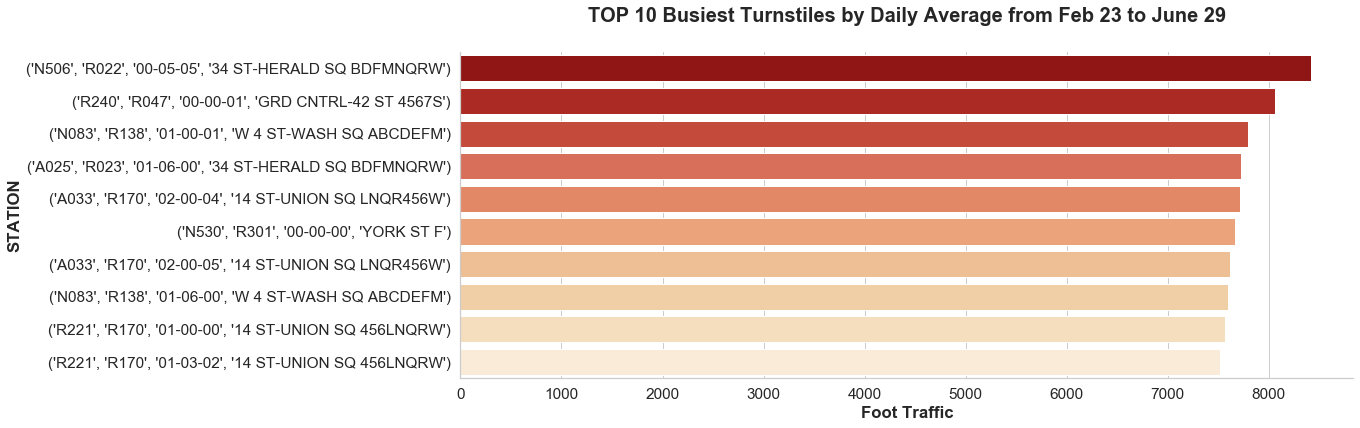

In [302]:
# plotting the top 10 busiest turnstiles in NYC

diverging_colors = sns.color_palette("OrRd_r", 10)
sns.set(style="whitegrid", font_scale=1.4)
plt.figure(figsize=(16,6))

sns.barplot(x=ave, y=ave.index, palette= diverging_colors)

plt.title('TOP 10 Busiest Turnstiles by Daily Average from Feb 23 to June 29', weight = 'bold', pad='30').set_fontsize('20')
plt.xlabel('Foot Traffic', weight='bold')
plt.ylabel('STATION', weight='bold')

sns.despine();

## 3.2 Analysis: Grouping turnstile data by each unique subway station

In [303]:
# grouping the turnstile data by unique station/line combination

groups = tunstiles.groupby(['STATION_LINE']).sum().sort_values(ascending=False)

In [304]:
# top 10 busiest stations by daily average

top_10_daily_ave = groups.head(10) / 126

top_10_daily_ave.reset_index()

,STATION_LINE,DELTA
0,GRD CNTRL-42 ST 4567S,228789.60
1,34 ST-HERALD SQ BDFMNQRW,203409.02
2,34 ST-PENN STA ACE,135057.32
3,42 ST-PORT AUTH ACENQRS1237W,131373.16
4,14 ST-UNION SQ LNQR456W,116259.71
5,TIMES SQ-42 ST 1237ACENQRSW,115447.80
6,FULTON ST 2345ACJZ,102755.56
7,47-50 STS ROCK BDFM,101136.79
8,59 ST COLUMBUS ABCD1,93643.76
9,FLUSHING-MAIN 7,88529.75


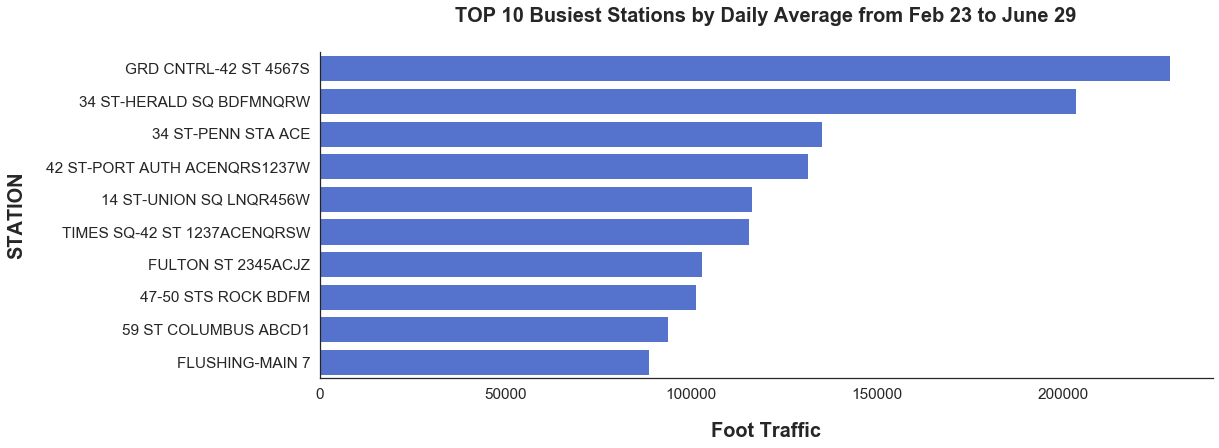

In [305]:
# plotting the top 10 busiest stations by daily average from Feb 23 to June 29

sns.set(style="white", font_scale=1.4)
plt.figure(figsize=(16,6))

sns.barplot(x=top_10_daily_ave, y=top_10_daily_ave.index, color='royalblue')

plt.title('TOP 10 Busiest Stations by Daily Average from Feb 23 to June 29', weight = 'bold', pad='30').set_fontsize('20')
plt.xlabel('Foot Traffic', weight='bold', fontsize='20', labelpad=20)
plt.ylabel('STATION', weight='bold', fontsize='20', labelpad=20)

sns.despine()

plt.savefig('TOP 10 Busiest Stations by Daily Average from Feb 23 to June 29.png');


## 3.3 Analysis grouping turnsile data by day of the week

In [306]:
# groups the entire dataframe by unique station/line and weekday

turnstiles_daily = df.groupby(['STATION_LINE', 'WEEKDAY'])['DELTA'].sum()

In [ ]:
# reduces the grouped data to only the busiest stations in NYC

busiest_stations_lst = ['GRD CNTRL-42 ST 4567S', '34 ST-HERALD SQ BDFMNQRW','34 ST-PENN STA ACE', '14 ST-UNION SQ LNQR456W']

busiest_stations = turnstiles_daily.loc[busiest_stations_lst]

In [ ]:
# average daily foot traffic for each of the busiest stations over an 18 week period

turnstiles_daily_ave = busiest_stations / 18

turnstiles_daily_ave = turnstiles_daily_ave.reset_index()


In [307]:
# changing the weekdays back to numbers so that we can sort them

days_rev = {'Monday':0,'Tuesday':1,'Wedsday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}

turnstiles_daily_ave.WEEKDAY = turnstiles_daily_ave.WEEKDAY.apply(lambda x: days_rev[x])

# turnstiles_daily_ave.sort_values('WEEKDAY')

sorted_daily = turnstiles_daily_ave.sort_values(['STATION_LINE', 'WEEKDAY'])

KeyError: 4

In [195]:
# converting the days back to names so that the labels will graph labels will look nice

sorted_daily['WEEKDAY'] = sorted_daily.WEEKDAY.apply(lambda x: days[x])

In [ ]:
# groups the weekday data by unique station/line

grouped = sorted_daily.groupby('STATION_LINE')

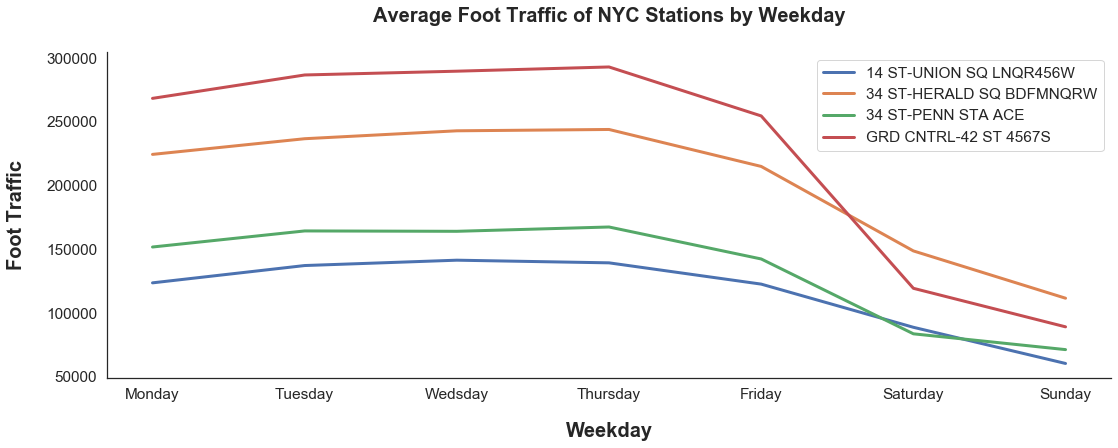

In [199]:
# line plot for average daily foot traffic

fig, ax = plt.subplots(figsize=(18,6))

for key, group in grouped:
    group.plot(ax=ax, x='WEEKDAY', y="DELTA", label=key, linewidth='3')
    
plt.legend(loc='upper right')

plt.title('Average Foot Traffic of NYC Stations by Weekday', weight = 'bold', pad=30).set_fontsize('20')
plt.xlabel('Weekday', weight='bold', fontsize='20', labelpad=20)
plt.ylabel('Foot Traffic', weight='bold', fontsize='20', labelpad=20)

sns.despine()

plt.savefig('Average Foot Traffic of NYC Stations by Weekday.png')

## 3.4 Analysis Looking at weekdays versus weekend

In [200]:
weekends = df[(df.WEEKDAY == 'Saturday') | (df.WEEKDAY == 'Sunday')]
weekdays = df[(df.WEEKDAY == 'Monday') | (df.WEEKDAY == 'Tuesday') | (df.WEEKDAY == 'Wedsday') | (df.WEEKDAY == 'Thursday') | (df.WEEKDAY == 'Friday')]

In [201]:
#weekends, weekdays

In [202]:
weekend_tunstiles = weekends.groupby(['C/A', 'UNIT', 'SCP', 'STATION'])['DELTA'].sum()

weekday_tunstiles = weekdays.groupby(['C/A', 'UNIT', 'SCP', 'STATION'])['DELTA'].sum()

In [203]:
diffs = weekday_tunstiles - weekend_tunstiles

In [204]:
top_10_ave_daily_diff = diffs.groupby('STATION').sum().sort_values(ascending=False).head(10) / 126

top_10_ave_daily_diff.reset_index()

,STATION,DELTA
0,34 ST-PENN STA,185672.79
1,GRD CNTRL-42 ST,169192.34
2,34 ST-HERALD SQ,129011.16
3,23 ST,119926.02
4,FULTON ST,114378.89
5,14 ST-UNION SQ,104714.13
6,TIMES SQ-42 ST,104207.20
7,42 ST-PORT AUTH,91954.72
8,86 ST,90364.62
9,PATH NEW WTC,80396.69


In [205]:
bot_10_ave_daily_diff = diffs.groupby('STATION').sum().sort_values(ascending=False).tail(10) / 28

bot_10_ave_daily_diff

STATION
AQUEDUCT RACETR   4688.54
BEACH 44 ST       4152.89
BEACH 90 ST       3779.11
ROCKAWAY PARK B   3247.32
BEACH 98 ST       2396.25
TOMPKINSVILLE     1973.04
METS-WILLETS PT   1355.75
BEACH 105 ST      1293.04
BROAD CHANNEL     1136.04
ORCHARD BEACH        2.50
Name: DELTA, dtype: float64

## Analysis 3.5 Looking at individual stations and time of day

In [261]:
# function that generates times and number of passengers exiting and entering a station for each time stamp

def indiv_statio_times(df, station_line):
    indiv_df = df[df.STATION_LINE == station_line]
    
    times = indiv_df.groupby(['C/A', 'UNIT', 'SCP', 'TIME'])['DELTA'].sum()
    
    return times.groupby(['TIME']).sum() 


In [262]:
# function that groups station traffic by 4 hour increments

def groupByTime(series,interval=[0, 4, 8, 12, 16, 20, 24]):
    grouped = series.groupby(pd.cut(series.index,interval , right=False)).sum()
    
    return grouped.sort_index() / 126
    

In [272]:
penn_station = groupByTime(indiv_statio_times(df, '34 ST-PENN STA ACE'))

In [271]:
union_sq = groupByTime(indiv_statio_times(df, '14 ST-UNION SQ LNQR456W'))

In [265]:
her_sq = groupByTime(indiv_statio_times(df, '34 ST-HERALD SQ BDFMNQRW'))

In [266]:
gran_cen = groupByTime(indiv_statio_times(df, 'GRD CNTRL-42 ST 4567S'))

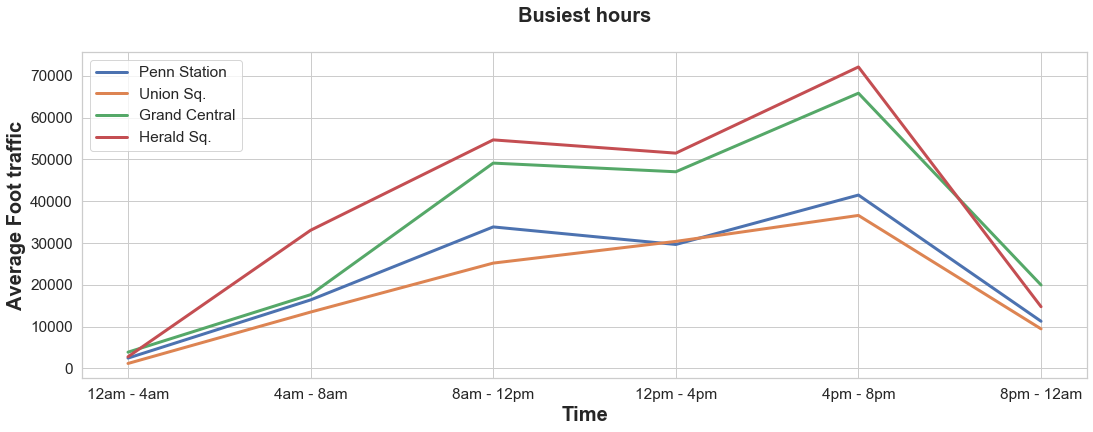

In [295]:
# line plot for the busiest time of day

sns.set_style('whitegrid')
plt.figure(figsize=(18,6))

for data in [penn_station, union_sq, her_sq, gran_cen]:
    sns.lineplot(x=['12am - 4am', '4am - 8am', '8am - 12pm', '12pm - 4pm', '4pm - 8pm' ,'8pm - 12am'], y=data, sort=False, linewidth='3')

plt.legend(labels=['Penn Station', 'Union Sq.', 'Grand Central', 'Herald Sq.'], loc='upper left')
plt.title('Busiest hours', weight = 'bold', pad='30').set_fontsize('20')
plt.xlabel('Time', weight='bold', fontsize='20')
plt.ylabel('Average Foot traffic', weight='bold', fontsize='20');

plt.savefig('Busiest hours.png')